In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hamiltonian as hm
import glob
import scipy.linalg as la

In [58]:
L = 11
dense = True
pert = False
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
if (pert): 
    prefix = prefix + "_pert_"
    fix    = fix    + "_pert_"
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [59]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

5 [ 0.00122972 -0.6722379 ]
6 [ 0.00607873 -0.71289193]
7 [ 0.0563774  -1.21385063]
8 [ 0.06442103 -1.59979992]
9 [ 0.03638807 -1.82991264]
10 [-0.00999743 -1.9705279 ]
11 [-0.06467006 -2.06190874]
12 [-0.12255466 -2.12452894]
14 [-0.23889154 -2.2019247 ]
16 [-0.35000779 -2.24522697]
18 [-0.45369229 -2.27102251]
20 [-0.54980397 -2.28700397]
22 [-0.63885671 -2.29714022]
24 [-0.72153756 -2.30363479]


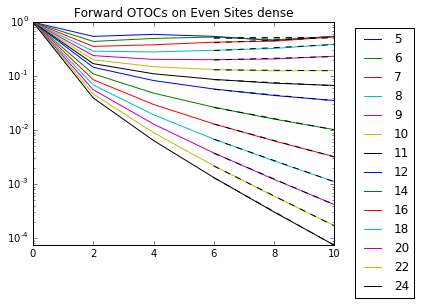

In [9]:
ax = plt.subplot(111)
gammas_fore_even = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[::2], otocfore[::2], label = str(vs[idx]))
    x = sites[6::2]
    y = otocfore[6::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

/Users/cstahl/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


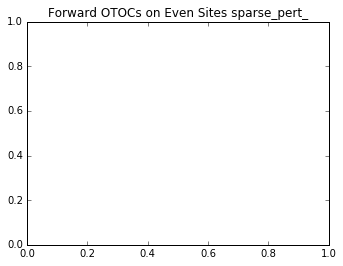

In [23]:
ax = plt.subplot(111)
gammas_fore_even = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites, otocfore, label = str(vs[idx]))
    x = sites[6:]
    y = otocfore[6:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
#     ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
plt.savefig('figures/otocs_' + fix + 'foreallL' + str(L) + '.pdf')
plt.show()

5 [-0.06744741 -0.5734842 ]
6 [-0.10147679 -0.50453978]
7 [-0.1380976  -0.50378641]
8 [-0.16018864 -0.62398884]
9 [-0.17589928 -0.80930958]
10 [-0.19682377 -0.99453925]
11 [-0.22553234 -1.15756743]
12 [-0.26050844 -1.29720299]
14 [-0.34118885 -1.5223413 ]
16 [-0.42707627 -1.69868544]
18 [-0.51245806 -1.84370467]
20 [-0.59489457 -1.96719065]
22 [-0.67345668 -2.07497993]
24 [-0.74790595 -2.17080044]


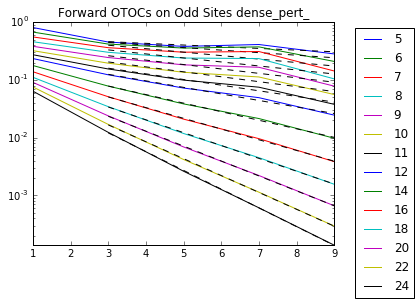

In [16]:
ax = plt.subplot(111)
gammas_fore_odd = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[1::2], otocfore[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocfore[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Odd Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreoddL' + str(L) + '.pdf')
plt.show()

5 [-0.060109   -0.71831913]
6 [-0.10417231 -0.63317263]
7 [-0.12809167 -0.76893234]
8 [-0.12954581 -1.11674025]
9 [-0.12543347 -1.53750464]
10 [-0.12503037 -1.94874837]
11 [-0.13048047 -2.32271158]
12 [-0.14239992 -2.64737979]
14 [-0.18492915 -3.13825244]
16 [-0.24636105 -3.44875866]
18 [-0.31848243 -3.63301406]
20 [-0.39527307 -3.73513454]
22 [-0.47306075 -3.78481508]
24 [-0.54976819 -3.80108203]


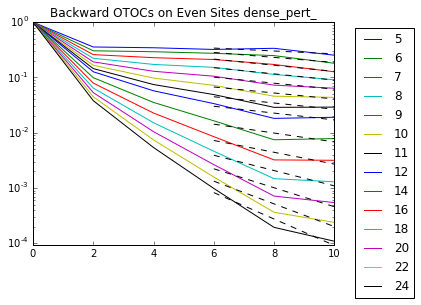

In [17]:
ax = plt.subplot(111)
gammas_back_even = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[::2], otocback[::2], label = str(vs[idx]))
    x = sites[6::2]
    y = otocback[6::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'backevenL' + str(L) + '.pdf')
plt.show()

5 [-0.11756644 -0.47734188]
6 [-0.18453629 -0.30472612]
7 [-0.24892529 -0.20921487]
8 [-0.30191094 -0.20328259]
9 [-0.34459671 -0.26795791]
10 [-0.37799208 -0.38965683]
11 [-0.40544633 -0.54657593]
12 [-0.43141296 -0.71357846]
14 [-0.48793684 -1.02247705]
16 [-0.55205251 -1.27628553]
18 [-0.62024235 -1.48236325]
20 [-0.68931301 -1.65295299]
22 [-0.75735714 -1.79747745]
24 [-0.82337563 -1.92248437]


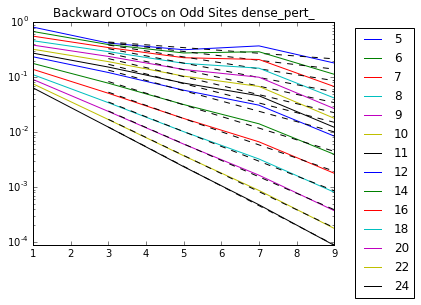

In [18]:
ax = plt.subplot(111)
gammas_back_odd = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[1::2], otocback[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocback[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Odd Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'backoddL' + str(L) + '.pdf')
plt.show()

Forward Odd:   v_butterfly=-2.33488130538
Backward Odd:  v_butterfly= -2.33488130538
Forward Even:  v_butterfly= -2.33488130538
Backward Even: v_butterfly= -2.33488130538


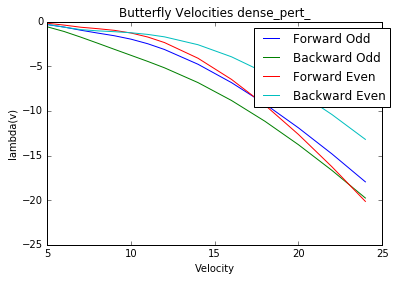

In [19]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore_odd,  label = "Forward Odd")
# coeffs = np.polyfit(vs[10:], gammas_fore_odd[10:], deg=1)
# ax.plot(vs[5:], coeffs[0]*vs[5:] + coeffs[1], 'k--')
print("Forward Odd:   v_butterfly=" + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_odd,  label = "Backward Odd")
# coeffs = np.polyfit(vs[10:], gammas_back_odd[10:], deg=1)
# ax.plot(vs[4:], coeffs[0]*vs[4:] + coeffs[1], 'k--')
print("Backward Odd:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_fore_even, label = "Forward Even")
# coeffs = np.polyfit(vs[10:], gammas_fore_even[10:], deg=1)
# ax.plot(vs[3:], coeffs[0]*vs[3:] + coeffs[1], 'k--')
print("Forward Even:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_even, label = "Backward Even")
# coeffs = np.polyfit(vs[10:], gammas_back_even[10:], deg=1)
# ax.plot(vs[2:], coeffs[0]*vs[2:] + coeffs[1], 'k--')
print("Backward Even: v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

5 [-0.00566243 -1.06166685]
5 [-0.11756644 -0.47734188]
8 [-0.10436759 -1.31277665]
8 [-0.30191094 -0.20328259]
11 [-0.23735207 -1.62916723]
11 [-0.40544633 -0.54657593]
16 [-0.48794487 -1.83566242]
16 [-0.55205251 -1.27628553]
22 [-0.75383876 -1.9006633 ]
22 [-0.75735714 -1.79747745]


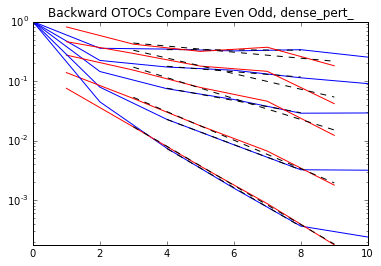

In [20]:
ax = plt.subplot(111)
for idx in range(0, len(vs), 3):
    ax.semilogy(sites[::2], otocsback[idx,::2], 'b', label = str(vs[idx]))
    x = sites[4:10:2]
    y = otocsback[idx,4:10:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    
    ax.semilogy(sites[1::2], otocsback[idx,1::2], 'r', label = str(vs[idx]))
    x = sites[3::2]
    y = otocsback[idx,3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs Compare Even Odd, " + fix)
# plt.savefig('figures/otocs_' + fix + 'backcompareL' + str(L) + '.pdf')
plt.show()

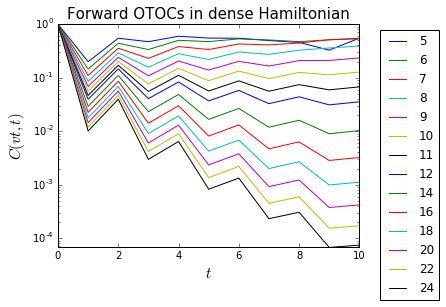

In [60]:
ax = plt.subplot(111)
gammas_fore_both = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites, otocfore, label = str(vs[idx]))
    x = sites[3:7]
    y = otocfore[3:7]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
#     ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_both.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs in dense Hamiltonian", fontsize=15)
plt.ylabel("$C(vt,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.savefig('figures/otocs_' + fix + 'foreallL' + str(L) + '.pdf')
plt.show()

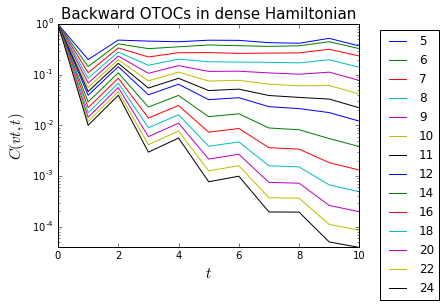

In [61]:
ax = plt.subplot(111)
gammas_back_both = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites, otocback, label = str(vs[idx]))
    x = sites[3:7]
    y = otocback[3:7]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
#     ax.semilogy(x,yfit(x), 'k--')
    gammas_back_both.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs in dense Hamiltonian", fontsize=15)
plt.ylabel("$C(vt,t)$", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.savefig('figures/otocs_' + fix + 'backallL' + str(L) + '.pdf')
plt.show()

Forward:   v_butterfly=-2.2051725786
Backward:  v_butterfly= -2.2051725786


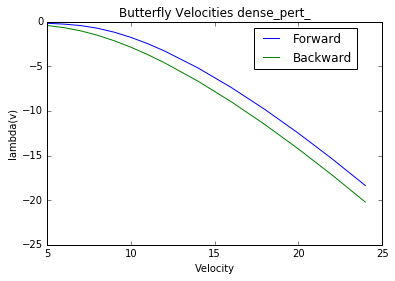

In [53]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore_both,  label = "Forward")
# coeffs = np.polyfit(vs[3:], gammas_fore_both[3:], deg=1)
# ax.plot(vs[5:], coeffs[0]*vs[5:] + coeffs[1], 'k--')
print("Forward:   v_butterfly=" + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_both,  label = "Backward")
# coeffs = np.polyfit(vs[3:], gammas_back_both[3:], deg=1)
# ax.plot(vs[4:], coeffs[0]*vs[4:] + coeffs[1], 'k--')
print("Backward:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/balanced_butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [ ]:
print(gammas_fore_both)
print(vs)

In [ ]:
vs

##### type(np.poly1d(coeffs))

In [ ]:
# hm.chop(la.expm(1j * np.pi * .5 * (np.kron(hm.Z, hm.Z) + np.kron(hm.X, hm.X) + np.kron(hm.Y, hm.Y))))
hm.chop(((np.kron(hm.Z, hm.Z) + np.kron(hm.X, hm.X) + np.kron(hm.Y, hm.Y))-np.eye(4))/2)
# np.kron(hm.Y, hm.Y)

In [ ]:
hm.chop(la.expm(np.zeros((4,4))))

In [24]:
vs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20, 22, 24])

In [43]:
fix

'dense'